In [491]:
from sympy import MatrixSymbol, BlockMatrix, init_printing, ZeroMatrix, symbols, Identity, Matrix, block_collapse
from sympy import DiagonalMatrix, sqrt
init_printing()

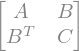

In [473]:
A = MatrixSymbol('A', 3, 3)
B = MatrixSymbol('B', 3, 3)
C = MatrixSymbol('C', 3, 3)
M = BlockMatrix(
    [
        [A, B],
        [B.T, C]
    ]
)
M

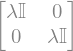

In [474]:
lamb = symbols(r'\lambda')
Id = Identity(3)
Z = ZeroMatrix(3,3)
Lamb = BlockMatrix(
    [
        [lamb*Id, Z],
        [Z, lamb*Id]
    ]
)
Lamb

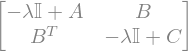

In [475]:
MLamb = BlockMatrix(
    [
        [A - lamb*Id, B],
        [B.T, C - lamb*Id]
    ]
)
MLamb

In [476]:
MLamb_schur = MLamb.schur('A')#.subs(A - lamb*Id, A)
MLamb_schur

In [477]:
MLamb_schur

In [478]:
MLamb.schur('D')

In [479]:
M.schur('A')

In [480]:
M.schur('D')

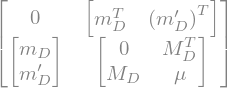

In [486]:
n = 2
mD = MatrixSymbol('m_D', n,n)
mDp = MatrixSymbol('{{m^\prime_D}}', n,n)
MD = MatrixSymbol('M_D', n,n)
mu = MatrixSymbol(r'\mu', n,n)
Z1 = ZeroMatrix(n,n)
BD = BlockMatrix(
    [
        [mD],
        [mDp]
    ]
)
CD = BlockMatrix(
    [
        [Z1, MD.T],
        [MD, mu]
    ]
)
MLRiss = BlockMatrix(
    [
        [Z1, BD.T],
        [BD, CD],
    ]
)
MLRiss

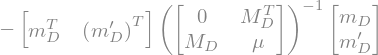

In [487]:
MLRiss.schur('D', generalized=True)

In [499]:
MLRiss_schurD = block_collapse(MLRiss.schur('D', generalized=True)).expand()
MLRiss_schurD

In [512]:
epsilonL = symbols(r'\epsilon_L')

In [513]:
block_collapse(MLRiss_schurD.replace(mDp,epsilonL*MD))

In [500]:
k1, vL, vR = symbols('k_1, v_L, v_R', positive=True)
Y = MatrixSymbol('Y', n, n)

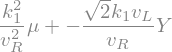

In [501]:
block_collapse(
    MLRiss_schurD.replace(mD, k1/sqrt(2)*Y).replace(mDp, vL/sqrt(2)*Y).replace(MD, vR/sqrt(2)*Y)
).replace(Y.T, Y).expand()

In [502]:
MLRiss_schurD_mDp0 = block_collapse(MLRiss.subs(mDp,Z1).schur('D', generalized=True)).expand()
MLRiss_schurD_mDp0

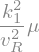

In [503]:
block_collapse(
    MLRiss_schurD_mDp0.replace(mD, k1/sqrt(2)*Y).replace(MD, vR/sqrt(2)*Y)
).replace(Y.T, Y).expand()